<a href="https://colab.research.google.com/github/MuchereShawn/WeightsandBiases/blob/main/Weightsand_BiasDecisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip  install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.6/303.6 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.6 MB/s eta 0:00:00


In [21]:
import wandb
from sklearn.model_selection import train_test_split



In [7]:
wandb.init(project="Phishing-DecisionTrees-Regression")

wandb: Currently logged in as: mukoyanishawn33 (mukoyanishawn33-usiu). Use `wandb login --relogin` to force relogin


In [8]:
config = wandb.config
config.learning_rate = 0.01
config.epochs = 10


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [15]:
data = pd.read_csv('/content/urlset (1).csv', encoding='latin-1', on_bad_lines='skip')

In [11]:
wandb.head()


,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label,Unnamed: 14
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1,0,18.0,107.611111,107.277778,0.0,0.0,0.0,0,0.8,0.795729,1,NaN
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0,0,11.0,150.636364,152.272727,0.0,0.0,0.0,0,0,0.768577,1,NaN
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0,0,14.0,73.500000,72.642857,0.0,0.0,0.0,0,0,0.726582,1,NaN
3,mail.printakid.com/www.online.americanexpress....,10000000,0,0,6.0,562.000000,590.666667,0.0,0.0,0.0,0,0,0.85964,1,NaN
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0,0,8.0,29.000000,24.125000,0.0,0.0,0.0,0,0,0.748971,1,NaN


In [12]:
pd.crosstab([wandb['mld_res'],wandb['mld.ps_res']],wandb['label'])

label                   0  0.7'8049  0.770083      1
mld_res  mld.ps_res                                 
0        0           5867         0         0  37672
         1              9         0         0      1
1        0           5249         0         0   6378
         1           6396         0         0   3853
10000000 0              0         1         1      0

In [13]:
wandb['label']=wandb['label'].replace([1],'phishing')
wandb['label']=wandb['label'].replace([0],'legitimate')


In [16]:
wandb

from sklearn import tree

X = data.drop(columns=['label','domain'])
y = data['label']



In [17]:
X

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,Unnamed: 14
0,10000000,1,0,18.0,107.611111,107.277778,0.000000,0.00000,0.000000,0,0.8,0.795729,NaN
1,10000000,0,0,11.0,150.636364,152.272727,0.000000,0.00000,0.000000,0,0,0.768577,NaN
2,10000000,0,0,14.0,73.500000,72.642857,0.000000,0.00000,0.000000,0,0,0.726582,NaN
3,10000000,0,0,6.0,562.000000,590.666667,0.000000,0.00000,0.000000,0,0,0.85964,NaN
4,10000000,0,0,8.0,29.000000,24.125000,0.000000,0.00000,0.000000,0,0,0.748971,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,10000000,0,0,1.0,10.000000,9.000000,0.000000,0.00000,0.000000,0,0,0.583333,NaN
65531,2425,1,1,1.0,129.000000,152.000000,0.006494,0.00565,0.007092,0.006098,0.5,0.682635,NaN
65532,10000000,0,0,1.0,164.000000,179.000000,0.000000,0.00000,0.000000,0,0,0.689655,NaN
65533,51274,0,0,4.0,654.750000,693.250000,0.000000,0.00000,0.000000,0,0,0.865099,NaN


In [18]:
y

0        1
1        1
2        1
3        1
4        1
        ..
65530    0
65531    0
65532    0
65533    0
65534    0
Name: label, Length: 65535, dtype: object

In [20]:
for col in X.columns:
    if X[col].dtype == 'object':
        try:
            X[col] = pd.to_numeric(X[col], errors='coerce')
        except:
            pass


X.fillna(X.mean(), inplace=True)
X.isnull().sum()
for i in range(len(y)):
    if y.dtype == 'object':
        try:
            y.iloc[i] = pd.to_numeric(y.iloc[i], errors='coerce')
        except:
            pass

y.fillna(y.mean(), inplace=True)

y.isnull().sum()

if pd.isna(y).any():
    X = X[~pd.isna(y)]
    y = y[~pd.isna(y)]


Streaming output truncated to the last 5000 lines.
<ipython-input-20-703a33657b8a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[i] = pd.to_numeric(y.iloc[i], errors='coerce')
<ipython-input-20-703a33657b8a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[i] = pd.to_numeric(y.iloc[i], errors='coerce')
<ipython-input-20-703a33657b8a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[i] = pd.to_numeric(y.iloc[i

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,Unnamed: 14
59131,10000000.0,0.0,0.0,2.0,259.000000,273.500000,0.0,0.0,0.0,0.0,0.00,0.743044,1.0
108,10000000.0,0.0,0.0,7.0,104.285714,104.571429,0.0,0.0,0.0,0.0,0.00,0.813896,1.0
2440,10000000.0,1.0,0.0,5.0,109.000000,108.000000,0.0,0.0,0.0,0.0,0.80,0.835871,1.0
35243,10000000.0,0.0,0.0,4.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,1.0
53679,10000000.0,0.0,0.0,3.0,183.666667,195.000000,0.0,0.0,0.0,0.0,0.00,0.747692,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62570,10000000.0,0.0,0.0,2.0,21.000000,12.500000,0.0,0.0,0.0,0.0,0.00,0.522727,1.0
38158,10000000.0,0.0,0.0,4.0,224.250000,242.250000,0.0,0.0,0.0,0.0,0.00,0.782235,1.0
860,10000000.0,0.0,0.0,7.0,40.142857,36.428571,0.0,0.0,0.0,0.0,0.00,0.717949,1.0
15795,2741.0,1.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.32,0.000000,1.0


In [24]:
X_test

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,Unnamed: 14
63126,10000000.0,1.0,0.0,5.0,84.600000,86.600000,0.002137,0.002092,0.002151,0.002105,0.816327,0.802105,1.0
41103,4570.0,1.0,1.0,14.0,107.000000,104.857143,0.004651,0.004065,0.002663,0.002037,0.571429,0.818516,1.0
3989,10000000.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
37213,10000000.0,0.0,0.0,6.0,232.500000,248.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.774293,1.0
30665,10000000.0,0.0,0.0,4.0,187.750000,198.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.793264,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,10000000.0,0.0,0.0,19.0,59.789474,54.473684,0.000000,0.000000,0.000000,0.000000,0.000000,0.692128,1.0
3489,11.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.513514,0.000000,1.0
44346,10000000.0,0.0,0.0,11.0,92.454545,91.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.765734,1.0
7078,10000000.0,0.0,0.0,8.0,184.375000,183.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.761078,1.0


In [25]:
y_train

59131    0.0
108      1.0
2440     1.0
35243    1.0
53679    0.0
        ... 
62570    0.0
38158    1.0
860      1.0
15795    1.0
56422    0.0
Name: label, Length: 52428, dtype: float64

In [26]:
y_test

63126    0.0
41103    1.0
3989     1.0
37213    1.0
30665    1.0
        ... 
19421    1.0
3489     1.0
44346    1.0
7078     1.0
40694    1.0
Name: label, Length: 13107, dtype: float64

In [27]:
for epoch in range(config.epochs):
  clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)



In [29]:

y_train = pd.Series(y_train)

# Define the bins for categorization (adjust these as needed)
bins = [float('-inf'), 0, float('inf')]
labels = ['Class1', 'Class2']  # Example class labels

# Use pd.cut to categorize the continuous values
y_train_categorized = pd.cut(y_train, bins=bins, labels=labels)

# Now use the categorized target for training
clf = clf.fit(X_train, y_train_categorized)


In [30]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [31]:
import pydotplus

In [32]:
from IPython.display import Image


In [33]:
dot_data= tree.export_graphviz(clf, feature_names=X.columns, class_names=['phishing','legitimate'],filled=True, out_file=None)

In [34]:
dot_data


'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="ranking <= 4067984.75\\nentropy = 0.838\\nsamples = 52428\\nvalue = [14023, 38405]\\nclass = legitimate", fillcolor="#81c1ee"] ;\n1 [label="card_rem <= 9.5\\nentropy = 0.985\\nsamples = 15147\\nvalue = [8666, 6481]\\nclass = phishing", fillcolor="#f8dfcd"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="ratio_Rrem <= 0.333\\nentropy = 0.937\\nsamples = 13326\\nvalue = [8615, 4711]\\nclass = phishing", fillcolor="#f3c6a5"] ;\n1 -> 2 ;\n3 [label="entropy = 0.612\\nsamples = 1532\\nvalue = [231, 1301]\\nclass = legitimate", fillcolor="#5caeea"] ;\n2 -> 3 ;\n4 [label="entropy = 0.868\\nsamples = 11794\\nvalue = [8384, 3410]\\nclass = phishing", fillcolor="#f0b48a"] ;\n2 -> 4 ;\n5 [label="card_rem <= 14.5\\nentropy = 0.184\\nsamples = 1821\\nvalue = [51, 1770]\\nclass = legitimate", fillcolor="#3fa0e6"] ;\n1 -> 5 ;\n6 [label="entropy 

In [35]:
graph=pydotplus.graph_from_dot_data(dot_data)



In [36]:
graph

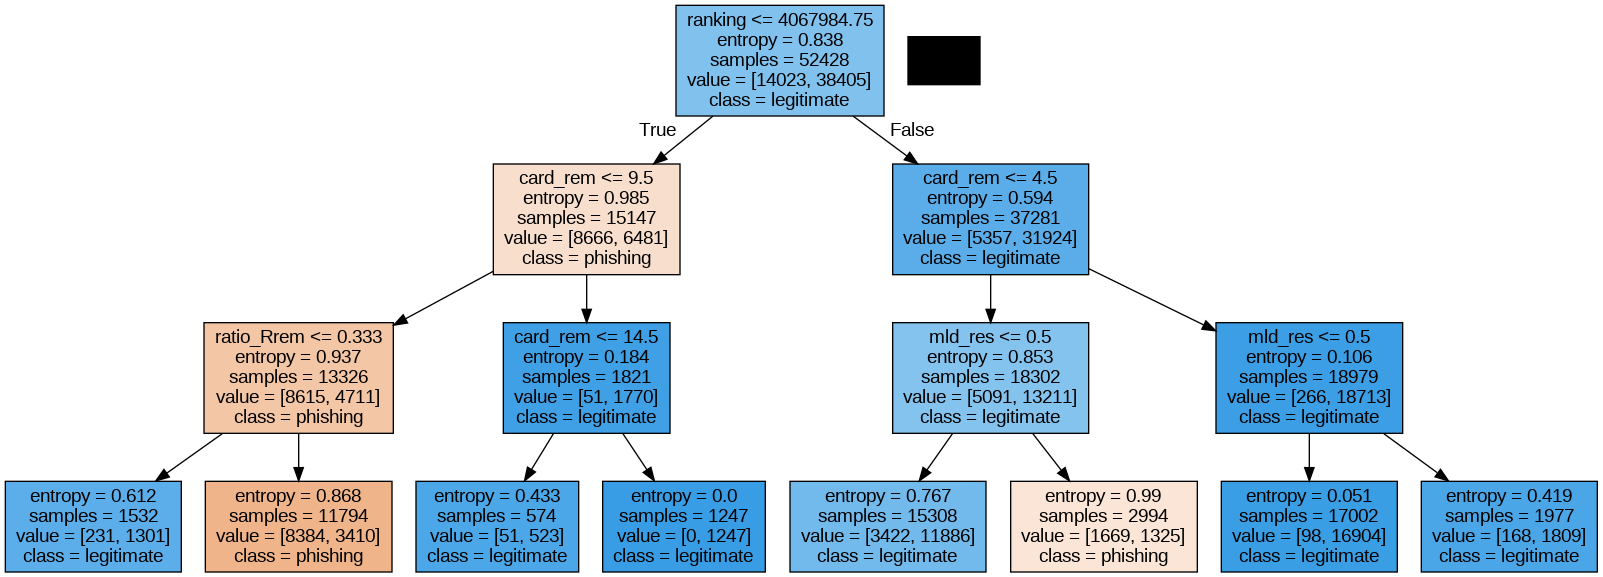

In [37]:
Image(graph.create_png())


In [38]:
predY=clf.predict(X_test)


In [39]:
predY

array(['Class2', 'Class2', 'Class1', ..., 'Class2', 'Class2', 'Class2'],
      dtype=object)

In [53]:
logmodel = LogisticRegression()

In [58]:
# Assuming y_train is a pandas Series
y_train_categorical = pd.cut(y_train, bins=[-float('inf'), 0, 10, float('inf')], labels=['low', 'medium', 'high'])

In [60]:
logmodel.fit(X_train, y_train_categorical)


LogisticRegression()

In [61]:
prediction = logmodel.predict(X_test)

In [62]:
prediction= logmodel.predict(X_test)

In [63]:
prediction

array(['medium', 'low', 'medium', ..., 'medium', 'medium', 'low'],
      dtype=object)

In [41]:
y_test


63126    0.0
41103    1.0
3989     1.0
37213    1.0
30665    1.0
        ... 
19421    1.0
3489     1.0
44346    1.0
7078     1.0
40694    1.0
Name: label, Length: 13107, dtype: float64

In [68]:
from sklearn.preprocessing import LabelEncoder

predictions = clf.predict(X_train)

label_encoder = LabelEncoder()

encoded_predictions = label_encoder.fit_transform(predictions)

binarizer = Binarizer(threshold=0.5)
binary_predictions = binarizer.fit_transform(encoded_predictions.reshape(-1, 1))




In [75]:
wandb.init()
wandb.log({'epoch': epoch + 1})


In [49]:
wandb.finish()